In [1]:
import pandas as pd
import numpy as np
#reading values from csv table
df_train = pd.read_csv('train_values.csv')
df_train_labels = pd.read_csv('train_labels.csv')
df_test = pd.read_csv('test_values.csv')

In [2]:
df_train = pd.merge(df_train,df_train_labels, on = 'patient_id')

In [3]:
df_train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Performing required EDA

In [4]:
df_train['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [5]:
df_train['slope_of_peak_exercise_st_segment'].value_counts()

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

In [6]:
df_train.shape

(180, 15)

In [7]:
df_train['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [8]:
df_train['num_major_vessels'].value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

In [9]:
import seaborn as sns
sns.countplot(df_train['thal'], hue = df_train['heart_disease_present'])

In [10]:
df_train1 = df_train.copy()
df_train1['thal'].replace(to_replace=['normal','reversible_defect','fixed_defect'], value=[0,1,2],inplace=True)

In [11]:
df_train1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
idx = df_test['patient_id']

In [13]:
#splitting X and y
X = df_train1.drop(['patient_id','heart_disease_present'], axis =1)
y = df_train1['heart_disease_present']

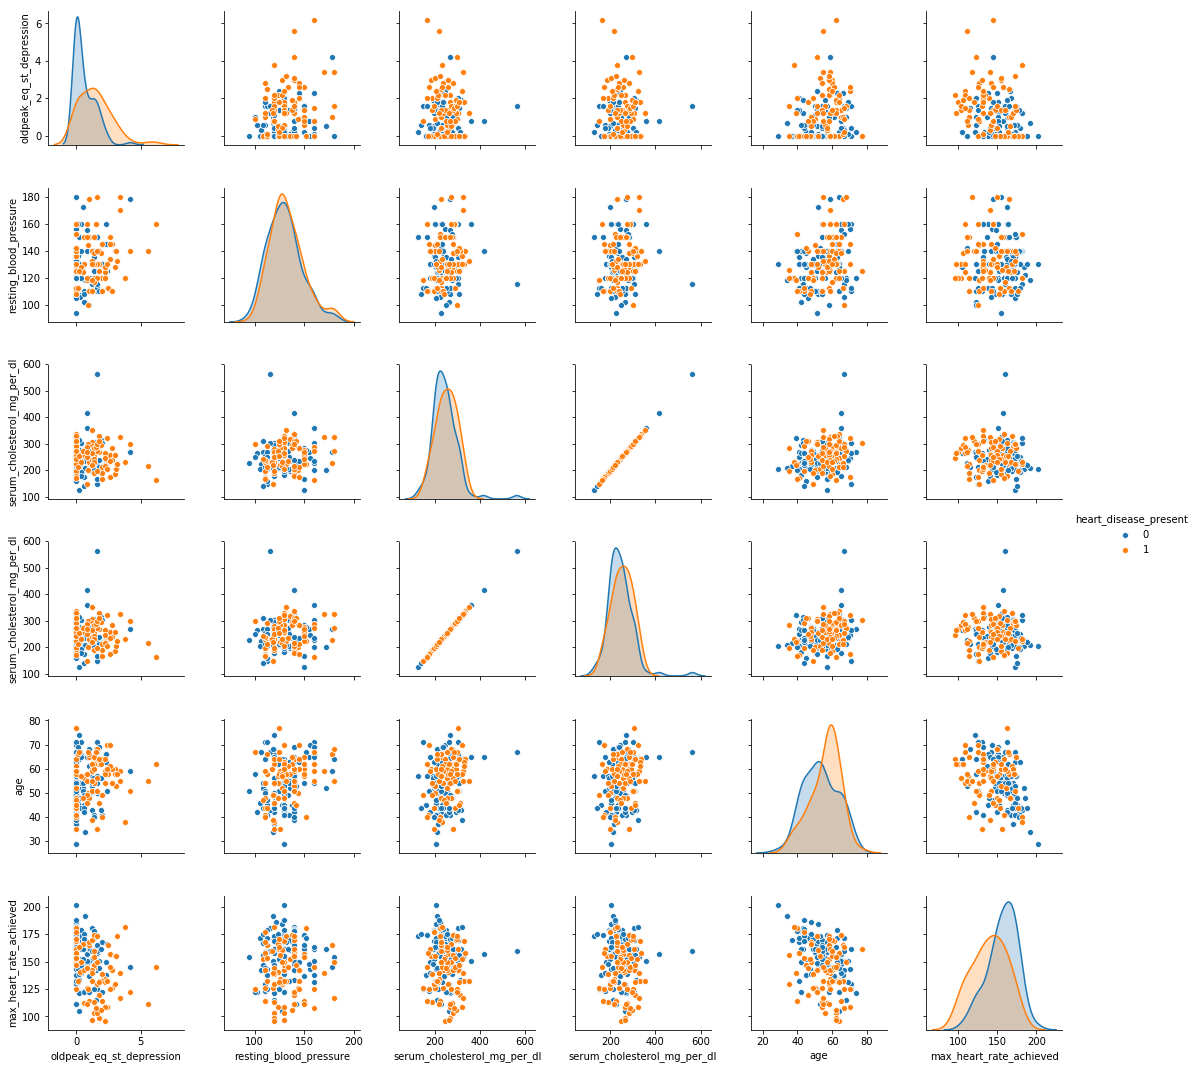

In [14]:
sns.pairplot(df_train, vars = ['oldpeak_eq_st_depression','resting_blood_pressure','serum_cholesterol_mg_per_dl','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved'], hue = 'heart_disease_present')

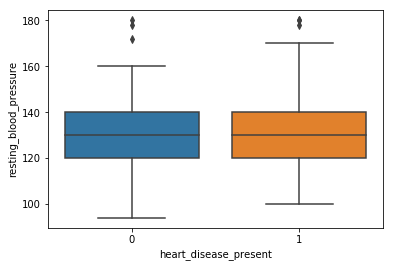

In [15]:
sns.boxplot(df_train['heart_disease_present'],df_train['resting_blood_pressure'])

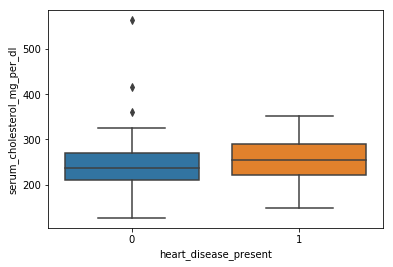

In [16]:
sns.boxplot(df_train['heart_disease_present'],df_train['serum_cholesterol_mg_per_dl'])

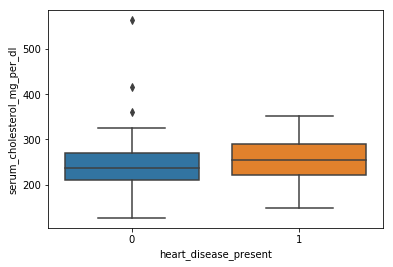

In [17]:
sns.boxplot(df_train['heart_disease_present'],df_train['serum_cholesterol_mg_per_dl'])

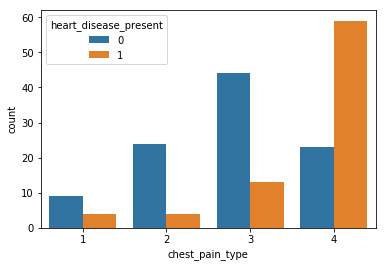

In [18]:
sns.countplot(df_train['chest_pain_type'], hue = df_train['heart_disease_present'])

In [19]:
tr_1=df_train[df_train['chest_pain_type']==1]
tr_2=df_train[df_train['chest_pain_type']==2]
tr_3=df_train[df_train['chest_pain_type']==3]
tr_4=df_train[df_train['chest_pain_type']==4]

In [20]:
print('heart disease present for cat1')
print((len(tr_1[tr_1['heart_disease_present']==0])/len(tr_1))*100)
print((len(tr_1[tr_1['heart_disease_present']==1])/len(tr_1))*100)

print()

print('heart disease present for cat 2')
print((len(tr_2[tr_2['heart_disease_present']==0])/len(tr_2))*100)
print((len(tr_2[tr_2['heart_disease_present']==1])/len(tr_2))*100)

print()

print('heart disease present for cat3')
print((len(tr_3[tr_3['heart_disease_present']==0])/len(tr_3))*100)
print((len(tr_3[tr_3['heart_disease_present']==1])/len(tr_3))*100)

print()
print('heart disease present for cat4')
print((len(tr_4[tr_4['heart_disease_present']==0])/len(tr_4))*100)
print((len(tr_4[tr_4['heart_disease_present']==1])/len(tr_4))*100)

heart disease present for cat1
69.23076923076923
30.76923076923077

heart disease present for cat 2
85.71428571428571
14.285714285714285

heart disease present for cat3
77.19298245614034
22.807017543859647

heart disease present for cat4
28.04878048780488
71.95121951219512


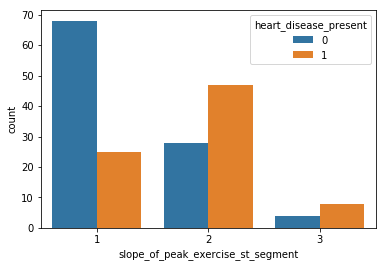

In [21]:
sns.countplot(df_train['slope_of_peak_exercise_st_segment'],hue = df_train['heart_disease_present'])

In [22]:
tr_1=df_train[df_train['slope_of_peak_exercise_st_segment']==1]
tr_2=df_train[df_train['slope_of_peak_exercise_st_segment']==2]
tr_3=df_train[df_train['slope_of_peak_exercise_st_segment']==3]

In [23]:

print('heart disease present for cat1')
print((len(tr_1[tr_1['heart_disease_present']==0])/len(tr_1))*100)
print((len(tr_1[tr_1['heart_disease_present']==1])/len(tr_1))*100)

print()

print('heart disease present for cat2')
print((len(tr_2[tr_2['heart_disease_present']==0])/len(tr_2))*100)
print((len(tr_2[tr_2['heart_disease_present']==1])/len(tr_2))*100)

print()

print('heart disease present for cat3')
print((len(tr_3[tr_3['heart_disease_present']==0])/len(tr_3))*100)
print((len(tr_3[tr_3['heart_disease_present']==1])/len(tr_3))*100)

print()

heart disease present for cat1
73.11827956989248
26.881720430107524

heart disease present for cat2
37.333333333333336
62.66666666666667

heart disease present for cat3
33.33333333333333
66.66666666666666



In [24]:

X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0


In [25]:
X.drop(['resting_blood_pressure','serum_cholesterol_mg_per_dl'],axis = 1, inplace = True)

# Model building

logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression()
y_pred = cross_val_predict(lr, X, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(lr, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix, log_loss
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
print(log_loss(y,y_pred[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       101
           1       0.81      0.82      0.82        79

   micro avg       0.84      0.84      0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

[[86 15]
 [14 65]]
0.41933558722766817


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

knearestneighbor

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
y_pred = cross_val_predict(knn, X, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(knn, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix, log_loss
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
log_loss(y,y_pred[:,1])

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       110
           1       0.56      0.64      0.60        70

   micro avg       0.67      0.67      0.67       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.68      0.67      0.67       180

[[75 35]
 [25 45]]


0.6295623199981419

mlp classifiers

In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',random_state=5)
y_pred = cross_val_predict(clf, X, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(clf, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix, log_loss
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
log_loss(y,y_pred[:,1])

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       104
           1       0.78      0.82      0.79        76

   micro avg       0.82      0.82      0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180

[[86 18]
 [14 62]]


0.42978129857071773

Support Vector Machine

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model = SVC(probability=True)
y_pred = cross_val_predict(model, X, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(model, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
print(log_loss(y,y_pred[:,1]))

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       126
           1       0.40      0.59      0.48        54

   micro avg       0.61      0.61      0.61       180
   macro avg       0.59      0.61      0.58       180
weighted avg       0.67      0.61      0.63       180

[[78 48]
 [22 32]]
0.6382997582785211


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

XGBOOST

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'dart', learning_rate=0.1, n_estimators=1000)
y_pred = cross_val_predict(xgb, X, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(xgb, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
log_loss(y,y_pred[:,1])

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.78      0.81      0.79        77

   micro avg       0.82      0.82      0.82       180
   macro avg       0.81      0.82      0.81       180
weighted avg       0.82      0.82      0.82       180

[[85 18]
 [15 62]]


0.6060226027490911

LightGBM

In [68]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type = 'gbdt', objective = 'binary',n_estimator=15000,random_state=0,reg_alpha=1,reg_lambda=5,learning_rate=0.7,is_unbalance=True,tree_learner = 'feature')
y_pred = cross_val_predict(lgbm, X, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(lgbm, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
print(log_loss(y,y_pred[:,1]))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        97
           1       0.81      0.78      0.80        83

   micro avg       0.82      0.82      0.82       180
   macro avg       0.82      0.81      0.82       180
weighted avg       0.82      0.82      0.82       180

[[82 15]
 [18 65]]
0.4183464972526898


lightgbm with standardscalar

In [79]:
X1 = X.copy()

In [71]:
X1.head()

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,2,0,0,2,0.0,1,45,170,0
1,2,0,3,0,0,0,1.6,0,54,158,0
2,1,0,4,3,0,2,0.0,1,77,162,1
3,1,1,4,0,0,0,0.0,1,40,181,0
4,3,1,1,0,0,2,4.2,1,59,145,0


In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [73]:
X1[['oldpeak_eq_st_depression','age','max_heart_rate_achieved']]=sc.fit_transform(X1[['oldpeak_eq_st_depression','age','max_heart_rate_achieved']])

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [74]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type = 'gbdt', objective = 'binary',n_estimator=15000,random_state=0,reg_alpha=1,reg_lambda=5,learning_rate=0.7,is_unbalance=True,tree_learner = 'feature')
y_pred = cross_val_predict(lgbm, X1, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(lgbm, X1, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
print(log_loss(y,y_pred[:,1]))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        97
           1       0.81      0.78      0.80        83

   micro avg       0.82      0.82      0.82       180
   macro avg       0.82      0.81      0.82       180
weighted avg       0.82      0.82      0.82       180

[[82 15]
 [18 65]]
0.4189340200990093


XGBOOST with standard scalar

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'dart', learning_rate=0.1, n_estimators=1000)
y_pred = cross_val_predict(xgb, X1, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(xgb, X1, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
log_loss(y,y_pred[:,1])

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.78      0.81      0.79        77

   micro avg       0.82      0.82      0.82       180
   macro avg       0.81      0.82      0.81       180
weighted avg       0.82      0.82      0.82       180

[[85 18]
 [15 62]]


0.6059855576286016

lightgbm with feature transformation

In [81]:
X1[['oldpeak_eq_st_depression','age','max_heart_rate_achieved']] = X1[['oldpeak_eq_st_depression','age','max_heart_rate_achieved']].apply(lambda x: x**1/5)

In [82]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type = 'gbdt', objective = 'binary',n_estimator=15000,random_state=0,reg_alpha=1,reg_lambda=5,learning_rate=0.7,is_unbalance=True,tree_learner = 'feature')
y_pred = cross_val_predict(lgbm, X1, y, cv=10, method ='predict_proba')
y_pred1 = cross_val_predict(lgbm, X1, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred1,y))
print(confusion_matrix(y_pred1,y))
print(log_loss(y,y_pred[:,1]))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        97
           1       0.81      0.78      0.80        83

   micro avg       0.82      0.82      0.82       180
   macro avg       0.82      0.81      0.82       180
weighted avg       0.82      0.82      0.82       180

[[82 15]
 [18 65]]
0.4183464972526898


So with this we get that this problem is best solved by logistic regression or any model that is based on logistic regression 